# Use CDF to Calculate Probabilities (Practice)- Amber Kutscher
- Data Enrichment


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
females = df.loc[df['Gender'] == 'Female'].copy()

In [4]:
data = females['Height']

In [5]:
low_end = 55.0
high_end = 56.0

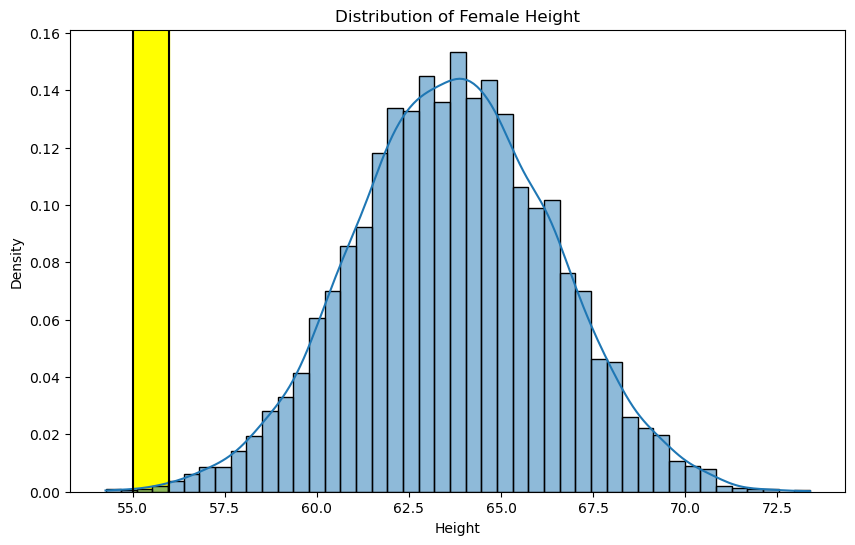

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density', kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color='black')
ax.axvline(high_end, color='black')
ax.axvspan(low_end, high_end, color='yellow', zorder=0);

In [7]:
# Plot the probability distribution with a KDE line and annotate the mean
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [8]:
print(mean)

63.708773603458006


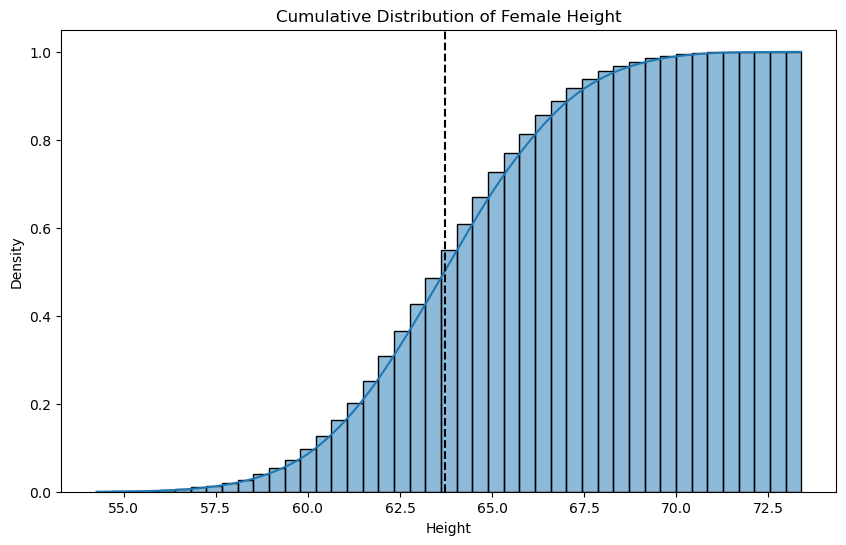

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density', kde=True, cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean, color='k', ls='--');

In [10]:
# Set the range and spacing for our nominal curve
x_range = np.linspace(min, max, 1000)

In [11]:
# Create the cdf for nominal data with the mean and std
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

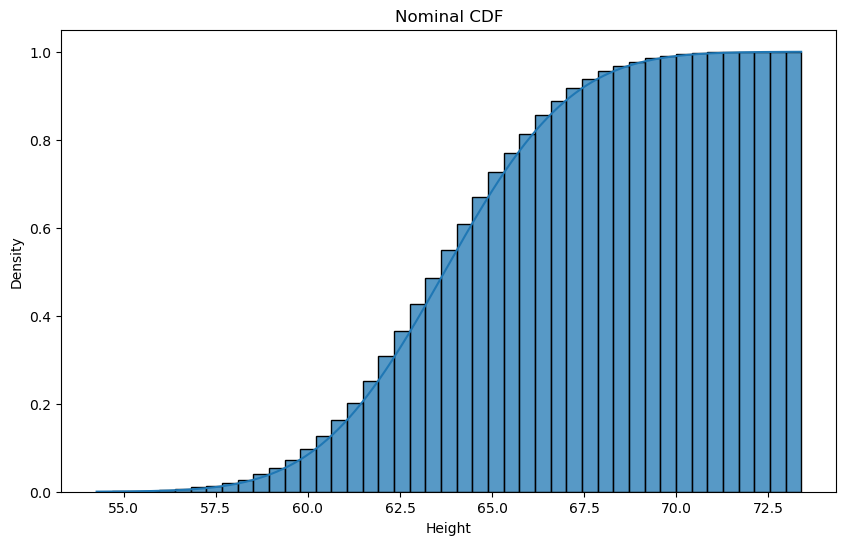

In [12]:
# Plot the nominal cdf
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density', cumulative=True)
ax.plot(x_range, cdf)
ax.set_title('Nominal CDF');

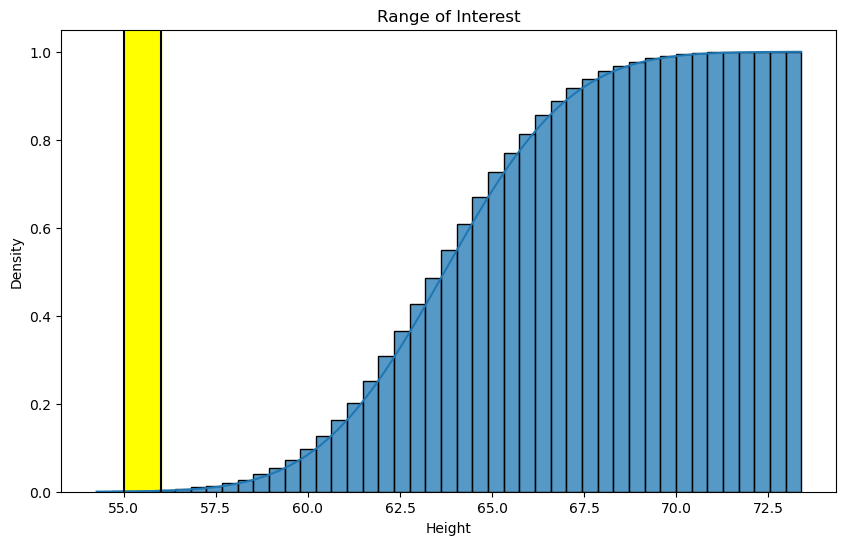

In [13]:
# Lets consider the low_end and high_end that we are interested in
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density', cumulative=True)
ax.plot(x_range, cdf)
ax.axvline(low_end, color='black')
ax.axvline(high_end, color='black')
ax.axvspan(low_end, high_end, color='yellow', zorder=0)
ax.set_title('Range of Interest');

## Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

### 1. between 55.0 and 56.0 inches

In [14]:
# Get area of range to determine the probability of a female's height being between 55.0 and 56.0 inches
stats.norm.cdf(high_end, loc=mean, scale=std) - stats.norm.cdf(low_end, loc=mean, scale=std)

0.0015043054289559897

- We found that there is a .002 probability (or a 0.2% chance) of a female having a height between 55.0 and 56.0 inches.

### 2. is less than 5 feet (60 in)

In [15]:
# Calculate the probability of the height being less than 5 feet (60 inches)
stats.norm.cdf(60, loc=mean, scale=std)

0.08446492725207488

- We found that there is a .084 probability (or a 8.4% chance) of a female having a height less than 5 feet (60 inches).

### 3. is greater than the mean (hint: do you know this answer intuitively?)

- Seeing as how the mean is the average of the data that we are inspecting, there would be a 50% chance of a females height being greater than the mean.